In [1]:
%%capture
%run ./algorithm/read_data.ipynb

### Random Forest Regressor

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
rfr = RandomForestRegressor(n_estimators=300,random_state=40,n_jobs=-1)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=40)

In [4]:
train_test_report(rfr)

Train score: 		         0.9931
Test score: 		         0.9563


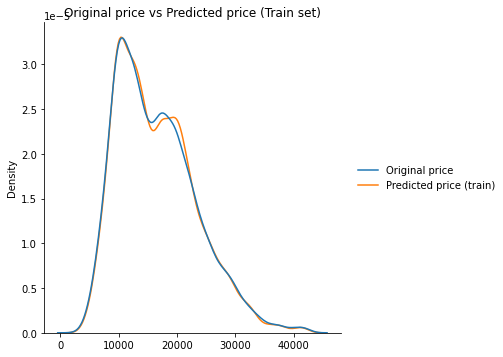

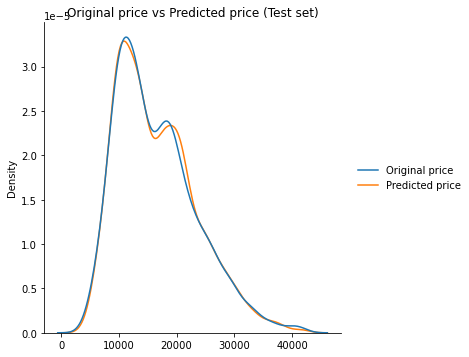

In [7]:
y_train_predict = rfr.predict(X_train)
data = pd.DataFrame({
    'Original price': y_train,
    'Predicted price (train)': y_train_predict
})
sns.displot(data=data, kind='kde')
plt.title('Original price vs Predicted price (Train set)')

y_test_predict = rfr.predict(X_test)
data = pd.DataFrame({
    'Original price': y_test,
    'Predicted price': y_test_predict
})
sns.displot(data=data, kind='kde')
plt.title('Original price vs Predicted price (Test set)')
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [6]:
parameters = {
    'max_depth': [10, 20, 50, 60, 100],
    'n_estimators': [50, 100, 200, 300, 500]  
}

In [8]:
rfr_tuned = GridSearchCV(rfr, parameters, cv=5, n_jobs=-1, verbose=1)
rfr_tuned.fit(X_train,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                             random_state=40),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50, 60, 100],
                         'min_samples_split': [4, 8],
                         'n_estimators': [5, 10, 50, 100, 200, 300, 500]},
             verbose=1)

In [11]:
gs_report(rfr_tuned)

Best score: 			         0.9555
Best parameters: 		{'max_depth': 20, 'min_samples_split': 8, 'n_estimators': 500}
Best estimator: 		RandomForestRegressor(max_depth=20, min_samples_split=8, n_estimators=500,
                      n_jobs=-1, random_state=40)


In [7]:
# for skip run gs search
rfr_tuned = RandomForestRegressor(max_depth=20,
                                  min_samples_split=8,
                                  n_estimators=500,
                                  n_jobs=-1,
                                  random_state=40)
rfr_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=8, n_estimators=500,
                      n_jobs=-1, random_state=40)

In [8]:
train_test_report(rfr_tuned)

Train score: 		         0.9830
Test score: 		         0.9583


In [9]:
regression_report_compare_model(rfr, rfr_tuned)

Before tuning hyperparameter: 

Accuracy score: 			         0.9563
R-squared score: 			         0.9563
Mean Absolute Error(MAE): 		      1002.0946
Mean Squared Error (MSE): 		   2119327.9782
Root Mean Squared Error (RSME): 	      1455.7912
-------------------------------------------------------
After tuning hyper parameter: 

Accuracy score: 			         0.9583
R-squared score: 			         0.9583
Mean Absolute Error(MAE): 		       986.1246
Mean Squared Error (MSE): 		   2024508.1985
Root Mean Squared Error (RSME): 	      1422.8521


In [10]:
pd.DataFrame(
    {
        'Tuned':
        cross_val_score(rfr_tuned, X, y, cv=10, n_jobs=-1).mean(),
        'Original':
        cross_val_score(rfr, X, y, cv=10, n_jobs=-1).mean()
    },
    index=['Score of CV'])


,Tuned,Original
Score of CV,0.837803,0.834056


### Show the importance of feature

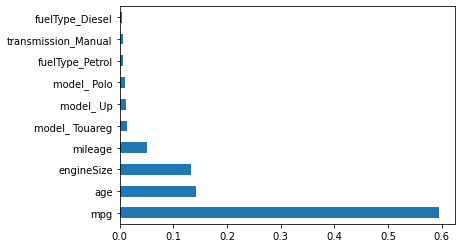

In [12]:
feature_importances = pd.Series(
    rfr_tuned.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot.barh()
plt.show()
